# Исследование данных о российском кинопрокате

Заказчик этого исследования — Министерство культуры Российской Федерации.

Необходимо изучить рынок российского кинопроката и выявить текущие тренды. Так же будет уделено внимание фильмам, которые получили государственную поддержку. Насколько такие фильмы интересны зрителю.

Для исследования будут использованы данные, опубликованные на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

## Шаг 1. Откроем файлы с данными и объединим их в один датафрейм. 

Объединим данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try: 
    df_mkrf_movies = pd.read_csv('mkrf_movies.csv')#, dtype={'puNumber' : 'int64'})
    df_mkrf_shows = pd.read_csv('mkrf_shows.csv')
except:
    df_mkrf_movies = pd.read_csv('/datasets/mkrf_movies.csv')#, dtype={'puNumber' : 'int64'})
    df_mkrf_shows = pd.read_csv('/datasets/mkrf_shows.csv')

Далее проверим считались ли данные, а так же выведем общую информацию по каждому датафрейму перед объединением.

In [2]:
display(df_mkrf_movies.head())
df_mkrf_movies.info()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [3]:
display(df_mkrf_shows.head())
df_mkrf_shows.info()

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Согласно полученной информации объединение двух датафреймов возможно по колонке `['puNumber']`. Но для начала необходимо привести колонку к общему типу. Так как значения по данной колонке должны быть количественными с типом `'int'`, а в таблице `df_mkrf_movies` тип по колонке указан как `'object'`, то можно предположить, что кроме числовых значений присутствует так называемый 'мусор' (текстовые значения, символы). Чтобы правильно преобразовать такие данные к типу `'int'` сначала необходимо строковые значения заполнить другим числовым значением (например: `-1`), указывающим на то, что по данной строке отсутствует индентификатор. 

Результат объединения двух таблиц будет присвоен новому датафрему с названием `df` без нежелательной потери данных.

In [4]:
# приведем колонку с индентификатором фильма к типу int
df_mkrf_movies['puNumber'] = (
    pd.to_numeric(df_mkrf_movies['puNumber'], errors='coerce')
    #.fillna(-1) # присваиваем строковым значениям определенное число
)

#проверим колонку puNumber на наличие пропусков
df_mkrf_movies[df_mkrf_movies['puNumber'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),NaN,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


В итоге имеется одно наименование с пропущенным значением прокатного удостоврения (`'NaN'`). Так как отсутствуют основные финансовые данные и рейтинга, по которым будет проводиться исследование, можно удалить из данных эту строчку.  

In [5]:
df_mkrf_movies = df_mkrf_movies[~df_mkrf_movies['puNumber'].isna()]

#проверим колонку puNumber на наличие пропусков
df_mkrf_movies[df_mkrf_movies['puNumber'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres


Перед объединением двух таблиц, посмотрим на сводные данные по `'df_mkrf_movies'` после удаления пропуска по колонке `['puNumber']`.

In [6]:
df_mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   float64
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [7]:
# объединяем два датафрейма в новый датафрейм df
df = df_mkrf_movies.merge(df_mkrf_shows, on='puNumber', how='left')

# приведем колонку puNumber к типу int
df['puNumber'] = df['puNumber'].astype(int)

# проверим данные после объединения
display(df.head())
df.info()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

После объединения двух датафреймов необходимо привести название колонки [`'puNumber'`] к общему стилю.

In [8]:
df = df.rename(columns={'puNumber' : 'pu_number'})
df.columns

Index(['title', 'pu_number', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office'],
      dtype='object')

## Шаг 2. Предобработка данных

Основываясь на полученных данных можно сделать однозначный вывод о наличии пропусков в данных по некоторым колонкам. Кроме того необходимо привести числовой признак по колонке `['ratings']` к типу `'float'`, а данные о `дате премьеры фильма` по колонке `'[show_start_date]'` к типу `datetime`.

Так же необходимо проверить данные на наличие дубликатов. Проверку на наличие явных дубликатов необходимо проводить до обработки пропусков во избежание искажения исходных данных, например при заполнении пропусков медианным значением.

В результате предобработки данных предлагается создать отдельный датафрейм `'df_filtered'` для обработанных данных для сохранения возможности их сравнения с исходными данными в датафрейме `'df'`.

In [9]:
df_filtered = df.copy()

### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

Приведем значения колонки `['show_start_date']` к типу `'datetime'`.

In [10]:
df_filtered['show_start_date'] = pd.to_datetime(df['show_start_date'], format='%Y-%m-%dT%H:%M:%S', errors='coerce')

Перед тем, как приводить следующую колонку c `рейтингом` к типу `'float'` проверим её на наличие строковых значений помимо пропусков.

In [11]:
df['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Среди уникальных значений обнаружено множество значений в виде процентов. Для того чтобы максимально сохранить данные для дальнейшего исследования предлагается` перевести такие значения в формат 10-ти бальной шкалы. 

Для начала отбросим символ `%` из значений.

In [12]:
#удалим из значений знак %
df_filtered['ratings'] = df['ratings'].str.strip('%').astype(float)

# приведем все значения рейтинга которые больше 10 к 10-ти бальной системе
df_filtered['ratings'] = (
    df_filtered['ratings']
    .where(df_filtered['ratings'] < 10, df_filtered['ratings'] / 10)
)

df_filtered['ratings'].unique() # проверка изменений

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

Наиболее важным и ценным при обработке пропусков в исходных данных является не полное избавление от них, связанное с заполнением средним и медианным значением или удалением, а нахождение связей с другими имеющимися данными, чтобы заполнить их более реальными значениями, не допустив значительных искажений в исходных данных. Хорошим показателем обработки пропусков с таким подходом будет на уровне 2-4% оставшихся пропусков, которые не сильно окажут влияние на дальнейшее исследование. Таким образом если по каким-то пропускам нет больше возможностей к нахождению приближенных значений можно оставить пропуски в виде `Nan`.

**Выведем количество пропущенных значений и их процентное соотношение по каждой колонке.**

In [13]:
pd.concat(
    [df.isna().sum(), (df.isna().sum() / len(df) * 100).round(2)],
    axis=1, 
    keys=['count', '%'],
    join='inner'
).sort_values(by='count', ascending=False)

,count,%
refundable_support,7153,95.56
nonrefundable_support,7153,95.56
budget,7153,95.56
financing_source,7153,95.56
box_office,4327,57.81
genres,975,13.03
ratings,966,12.91
producer,568,7.59
film_studio,18,0.24
director,9,0.12


Пропуски в данных есть почти в каждой колонке. Больше всего пропусков, где их доля превышает 95% процентов и имеет одинаковое количество пропусков (7154), в колонках с финансовой информацией:
* `['refundable_support']` (информация об объёме возвратных средств государственной поддержки);
* `['nonrefundable_support']` (информация об объёме невозвратных средств государственной поддержки);
* `['budget']` (информация об общем бюджете);
* `['financing_source']` (информация об источнике финансирования).

Необходимо проверить есть ли возможность восстановить данные о бюджете при наличии данных о государственной поддержке.

In [14]:
len(df[(~df['refundable_support'].isna() | ~df['nonrefundable_support'].isna()) & (df['budget'].isna())])

0

Таких данных о гос.поддержке не оказалось, поэтому заполнить пропуски по колонке `бюджет` нет возможности.

По остальным колонкам, имеющим пропуски так же нет взаимосвязанных признаков, которые могли бы быть использованы для заполнения пропущенных данных (например `жанр`, `рейтинг`, `продюсер`). Так же колонки о `бюджете`, `гос.поддержке` и `сборах` имеют целевые показатели по которым в дальнейшем будет проводиться исследовательский анализ данных. В связи с тем что пропусков по данным колонкам очень много заполнение их каким-либо значением приведет к серъезным искажениям в результатах исследования. Предлагается оставить пропуски со значением `Nan` и проводить исследование на небольшом количестве выборки (332 значения).

Заполним все пропуски в строковых признаках на значение `'unknown'`.

In [15]:
col_str = ['genres', 'producer', 'film_studio', 'director', 'production_country']
df_filtered[col_str] = df[col_str].fillna('unknown')

# проверим заполнение пропусков
df_filtered.isna().sum()
#df_filtered['genres'].unique()

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                    0
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   966
genres                      0
box_office               4327
dtype: int64

### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

Проверим, есть ли в данных явные дубликаты. 

In [16]:
df_filtered.duplicated().sum()

0

Проверим, есть ли повторяющиеся прокатные удостоверения с одним и тем же номером.

In [17]:
df_filtered['pu_number'].value_counts()

221054410    2
221154310    2
122001411    1
111008518    1
114002716    1
            ..
221015415    1
121021814    1
224028210    1
121013618    1
126002916    1
Name: pu_number, Length: 7483, dtype: int64

Таких значений 2. Посмотрим на них детально.

In [18]:
df_filtered[(df_filtered['pu_number'] == 221054410) | (df_filtered['pu_number'] == 221154310)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4637,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
5066,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
5067,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


Из таблицы видно, что фильмы под одним номером всё же разные. Удаление какого-либо из них не сильно исказит данные, так как они не имеют количественных признаков для дальнейшего исследования.

In [19]:
df_filtered = df_filtered.drop_duplicates(subset=['pu_number'])

# проверим снова на дубли
df_filtered['pu_number'].value_counts()

122001411    1
121000711    1
121017119    1
114002716    1
121012718    1
            ..
221015415    1
121021814    1
224028210    1
121013618    1
126002916    1
Name: pu_number, Length: 7483, dtype: int64

Посмотрим есть ли в данных несколько прокатных удостоверений на одни и те же фильмы.

In [20]:
df_filtered['title'].value_counts()

День святого Валентина_                   5
Код доступа "Кейптаун"                    4
Безумцы                                   4
Начало_                                   4
Знакомство с Факерами 2.                  4
                                         ..
Матрица: Революция                        1
Ночной пассажир                           1
Три богатыря и Шамаханская царица         1
МУЛЬТ в кино. Выпуск № 34                 1
Звёздные войны. Эпизод 3: Месть ситхов    1
Name: title, Length: 6770, dtype: int64

Да. Такие фильмы есть в данных. Для того чтобы определить являются ли они дубликатами, найдем отличия в данных.

In [21]:
df_filtered[df_filtered['title'] == 'День святого Валентина_']

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3901,День святого Валентина_,221083810,2010-07-15 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN
3990,День святого Валентина_,221068010,2010-05-14 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN
4069,День святого Валентина_,121002210,2010-02-03 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN
4195,День святого Валентина_,221136210,2010-11-30 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN
5069,День святого Валентина_,221066410,2010-06-01 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN


Скорее всего такие повторения считать дубликатами нельзя, так как у них разные прокатные удостоверения (номера по колонке `['pu_number']` выданые в разное время (колонка `['show_start_data']`).  Например фильм `'День святого Валентина'` 5 раз выходил в прокат в разные месяцы в 2010 году.

### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

Проверим, есть ли в данных неявные дубликаты.

Так как строковых значений и признаков очень много, предлагается проверить только значимые и поддающиеся проверке категориальные признаки (`['type']`, `['age_restriction']` и `['financing_source']`) в рамках данного проекта. 

In [22]:
display(df_filtered['type'].unique())
display(df_filtered['age_restriction'].unique())
display(df_filtered['financing_source'].unique())

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

По колонке `['type']` обнаружены неявные дубликаты, отличающиеся наличием пробелов в названиях категорий. Удалим пробелы в начале и конце строк. Сделаем это для всех строковых значений в исходном датафрейме. 

In [23]:
# создадим список колонок, имеющих строковый тип данных
col_object = df_filtered.columns[df_filtered.dtypes == 'object']

# удалим пробелы в начале и конце строки каждого значения выбраных колонок
for col in col_object:
    df_filtered[col] = df_filtered[col].str.strip()

# приведем значения колонки с типом фильма к нижнему регистру    
df_filtered['type'] = df_filtered['type'].str.lower()

# проверим значения в колонке с типом после обработки
df_filtered['type'].unique()

array(['художественный', 'анимационный', 'прочие', 'документальный',
       'научно-популярный', 'музыкально-развлекательный'], dtype=object)

### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

По условиям задания значения колонки `['budget']` должны включать в себя полный объем гос.поддержки, то есть значения из колонок `['refundable_support']` и `['nonrefundable_support']` Проверим случаи, когда значения в колонке `'бюджет'` будут равны `0` при наличии данных в колонках о `гос.поддержке`. 

In [24]:
df_filtered[(df_filtered['budget'] == 0) & ((df_filtered['refundable_support'] != 0) | (df_filtered['nonrefundable_support'] != 0))].head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2052,14+,111023614,2014-12-19 12:00:00+00:00,художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,10234016.1
2057,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,Фонд кино,6.6,драма,446163511.0
2471,Воин (2015),111017315,2015-09-28 12:00:00+00:00,художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",196572438.4
2531,Бармен.,111009615,2015-05-26 12:00:00+00:00,художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия,фэнтези",67418974.8
2614,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",184487551.4


Такие данные есть. Заполним нулевые значения в колонке `['budget']` суммой значений из колонок `['refundable_support']` и `['nonrefundable_support']`.

In [25]:
df_filtered['budget'] = (
    df_filtered['budget']
    .where(df_filtered['budget'] != 0, df_filtered['refundable_support'] + df_filtered['nonrefundable_support'])
)

# проверка на наличие оставшихся нулевых значений
len(df_filtered[(df_filtered['budget'] == 0) & 
    ((df_filtered['refundable_support'] != 0) | 
     (df_filtered['nonrefundable_support'] != 0))]
)

0

### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [26]:
df_filtered['year'] = pd.DatetimeIndex(df_filtered['show_start_date']).year

# выведем первые 10 строк датафрейма после внесения данных
# df_filtered.loc[:, ['show_start_date', 'year']].head(10)

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [27]:
df_filtered['main_director'] = df_filtered['director'].str.split(",").str[0]

# выведем первые 20 строк датафрейма после внесения данных
# df_filtered.loc[:, ['director', 'main_director']].head(20)

df_filtered['main_genre'] = df_filtered['genres'].str.split(",").str[0]

# удалим возможные пробелы в начале и в конце строки
df_filtered['main_director'] = df_filtered['main_director'].str.strip()
df_filtered['main_genre'] = df_filtered['main_genre'].str.strip()

# выведем первые 20 строк датафрейма после внесения данных
df_filtered.loc[:, ['genres', 'main_genre']].head(20)

,genres,main_genre
0,"боевик,драма,мелодрама",боевик
1,"драма,военный",драма
2,"фантастика,боевик,триллер",фантастика
3,"фантастика,боевик,триллер",фантастика
4,"фантастика,боевик,триллер",фантастика
5,драма,драма
6,"мелодрама,комедия",мелодрама
7,"мюзикл,мелодрама,комедия",мюзикл
8,"комедия,криминал",комедия
9,"мелодрама,комедия",мелодрама


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [28]:
df_filtered['fin_source_part'] = (
    (df_filtered['refundable_support'] + 
    df_filtered['nonrefundable_support']) / 
    df_filtered['budget']
).round(3)

# выведем последние 10 строк датафрейма после внесения данных
df_filtered.loc[~df_filtered['fin_source_part'].isna(), \
                ['refundable_support', 'nonrefundable_support', 'budget', 'fin_source_part']] \
                .tail(10)

,refundable_support,nonrefundable_support,budget,fin_source_part
7329,0.0,60000000.0,360054850.0,0.167
7343,0.0,30000000.0,47734050.0,0.628
7374,5000000.0,35000000.0,78422212.0,0.510
7452,80000000.0,40000000.0,270000000.0,0.444
7455,25000000.0,35000000.0,160000000.0,0.375
7463,100000000.0,400000000.0,980000000.0,0.510
7465,100000000.0,0.0,190000000.0,0.526
7473,100000000.0,400000000.0,944000000.0,0.530
7475,0.0,30000000.0,46154000.0,0.650
7477,40000000.0,60000000.0,150147502.0,0.666


## Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

Посмотрим сколько всего фильмов выходило в прокат, а точнее сколько было выдано прокатных удостоверений.

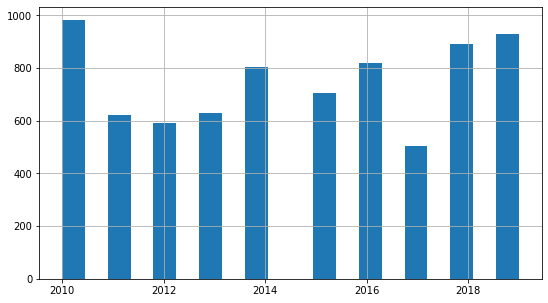

In [29]:
df_filtered['year'].hist(bins=20, figsize=(9, 5));

Используем `matplolib` для построения более наглядного графика выхода фильмов в прокат по годам.

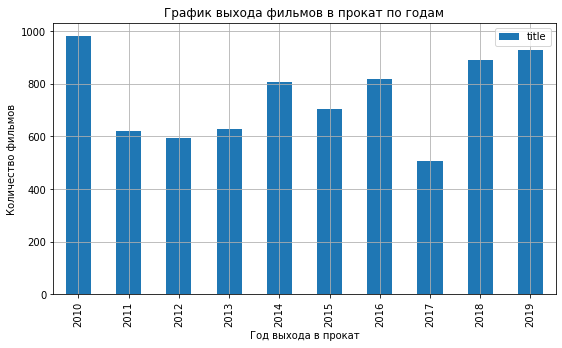

In [30]:
film_count_start = df_filtered[['year', 'title']] \
                    .pivot_table(index='year', values='title', aggfunc='count')

# построим график
film_count_start.plot(
    kind='bar',
    title='График выхода фильмов в прокат по годам',
    xlabel='Год выхода в прокат',
    ylabel='Количество фильмов',
    figsize=(9, 5),
    grid=True
)
plt.show()

`Больше` всего фильмов (чуть меньше `1000`) было выпущего в прокат в `2010` и `2019 годах`. `Меньше` всего (около `500`) в `2017 году`. Стоит отметить, что как уже было определено ранее, некоторые фильмы получали несколько прокатных удостоверений и вошли в статистику как отдельно взятые фильмы по условиям задачи. 

Если принять за информацию о выходе фильма в прокат наличие информации о `сборах` (колонка [`'box_office'`], то подсчитав общее количество выданных прокатных удостоверений (колонка [`'pu_number'`] и поделив на них количество, имеющее информацию о сборах получим долю прокатных удостоверений с указанной информацией о прокате в кинотеатрах.

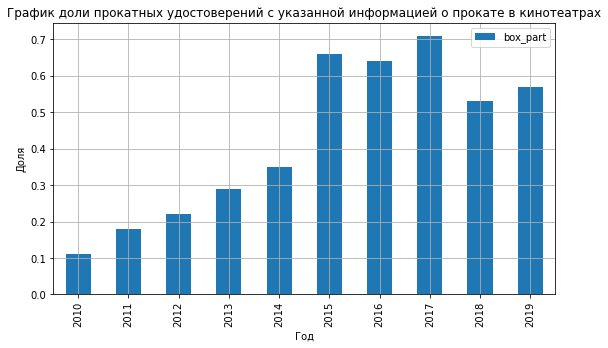

In [31]:
prokat_year = df_filtered.pivot_table(index='year', values=['pu_number', 'box_office'], \
                                    aggfunc='count')

# высчитаем долю прокатных удостоверений с указанной информацией о прокате в кинотеатрах
prokat_year['box_part'] = (prokat_year['box_office'] / prokat_year['pu_number']).round(2)

# построим график
prokat_year.plot(
    kind='bar',
    y='box_part',
    title='График доли прокатных удостоверений с указанной информацией о прокате в кинотеатрах',
    xlabel='Год',
    ylabel='Доля',
    figsize=(9, 5),
    grid=True
)
plt.show()

На графике видно, что до `2014 года` доля прокатных удостоверений, имеющих информацию о прокате (сборах) росла равномерно до `35%`. В `2015 году` отмечается скачкообразный рост до `65%`. Далее с `2016 года` отмечается неустойчивая тенденция с небольшим спадом до `52%` в `2018 году`. 

In [32]:
#CODE REVIEW
def calculate_non_null_share(series):
    return series.notna().mean()

<AxesSubplot:xlabel='year'>

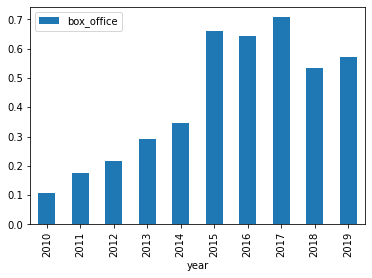

In [33]:
#CODE REVIEW
df_filtered.pivot_table(index='year', values='box_office', aggfunc=calculate_non_null_share)\
    .plot(kind='bar')

<hr style="border: 2px solid orange;" />

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

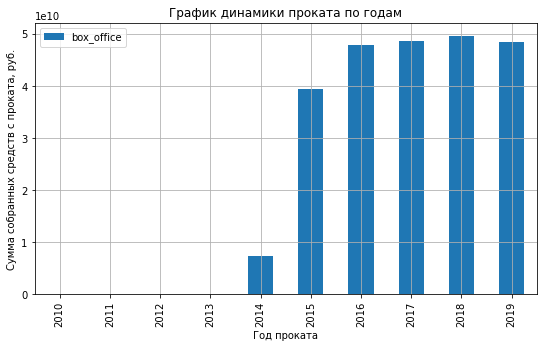

In [34]:
box_year = df_filtered.pivot_table(index='year', values='box_office', aggfunc='sum')

# построим график
box_year.plot(
    kind='bar',
    title='График динамики проката по годам',
    xlabel='Год проката',
    ylabel='Сумма собранных средств с проката, руб.',
    figsize=(9, 5),
    grid=True
)
plt.show()

С `2010` по `2013` год `сумма сборов` на порядки ниже чем, в остальные годы. Такие `сборы` могут говорить либо о том, что множество фильмов в этот период согласно представленных прокатных удостоверений не имели никаких `сборов` (что маловероятно), либо в данных о прокате в российских кинотеатрах (согласно объединенного файла `mkrf_shows.csv`) отсутсвтуют такие данные по многим прокатным удостоврениям. Таким образом судить о минимальной и максимальной сумме сборов по годам можно лишь условно без наличия полных данных:

* В `2010-2013` годах сумма сборов была `минимальной`;
* В `2018` году сумма сборов была `максимальной`.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [35]:
df_filtered.pivot_table(index='year', values='box_office', aggfunc=['mean', 'median'])

,mean,median
,box_office,box_office
year,,
2010,2.313004e+04,1700.000
2011,1.293832e+05,3000.000
2012,5.433924e+04,5660.000
2013,1.619549e+05,3522.500
2014,2.668442e+07,18160.000
2015,8.494057e+07,4920933.000
2016,9.100057e+07,3846679.410
2017,1.360328e+08,9968340.000


Расчеты `среднего` и `медианного` значения `суммы сборов` по каждому году подтверждают выявленные закономерности ранее. С `2010` по `2013` год `средняя` и `медианная` `сумма сборов` на порядок меньше, чем в остальные года. Большая разница между `средним` и `медианным` значениями объясняется неустойчивостью среднего к выбросам (очень большим значениям). Так как фильмы с очень большим `сбором` имеют место быть в представленных данных (кассовые фильмы, блокбастеры, хиты и т.д.), то удаление таких данных как выбросы не оправдано. `Медианное` значение в таком случае является лучшим показателем для отражения среднего по выборке.

* В `2017` году большая часть фильмов собрала в среднем почти `1 млн. руб.`, что больше чем в остальные годы.
* В `2010 - 2014` годах в среднем сборы составили намного меньше, чем в `2015-2019` годах. 

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [36]:
df_filtered.loc[df_filtered['year'] > 2014].groupby('age_restriction')['box_office'] \
    .agg(['count', 'sum']).sort_values(by='sum', ascending=False)

,count,sum
age_restriction,,
«16+» - для детей старше 16 лет,805,7.603473e+10
«12+» - для детей старше 12 лет,348,6.061945e+10
«6+» - для детей старше 6 лет,317,5.579861e+10
«18+» - запрещено для детей,792,4.075962e+10
«0+» - для любой зрительской аудитории,91,8.090774e+08


Фильмы с возрастным ограничением в `'16+ - для детей старше 16 лет'` собрали больше всего денег в прокате. Так же необходимо обратить внимание на то, что и количество прокатных удостоверений (или условно `'фильмов'`) представленных в данной категории больше всего, исходя из представленных данных о прокатных сборах.

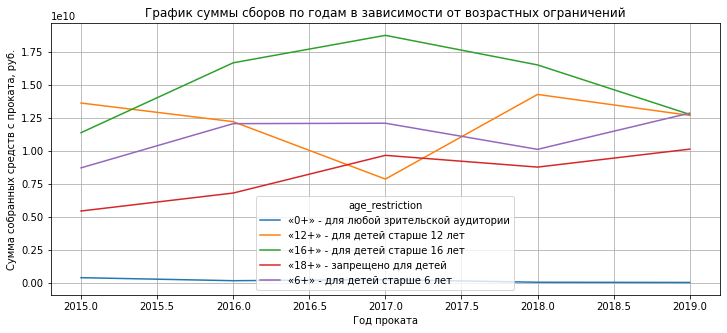

In [37]:
age_box_year = df_filtered.loc[df_filtered['year'] > 2014].pivot_table(index='year', columns='age_restriction', values='box_office', aggfunc='sum')

# age_box_year

# построим график
age_box_year.plot(
    title='График суммы сборов по годам в зависимости от возрастных ограничений',
    xlabel='Год проката',
    ylabel='Сумма собранных средств с проката, руб.',
    figsize=(12, 5),
    grid=True
)
plt.show()

Из графика выше видно, что:
* фильмы с возрастным ограничением в `'16+ - для детей старше 16 лет'` собирали больше всего денег в прокате с середины 2015 года по 2019 год. Скорее всего это связано с большим количеством высококассовых фильмов в данном сегменте; 
* фильмы с возрастным ограничением в `'0+ - для любой зрительской аудитории'` собирали меньше всего денег в прокате на протяжении представленного периода с 2015 по 2019 год. Возможно это связано с малым количеством фильмов в данной категории и как итог сумма сборов ниже, чем по остальным категориям;
* в 2017 году по категории возрастное ограничение - `'12+ - для детей старше 12 лет'` сборы значительно упали в то время как по остальным категорям наоборот выросли. Возможно в данный год фильмов с другими возрастными ограниченями было выпущено в прокат больше, в том числе кассовых.

## Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

### Кореляция признаков

Посмотрим как `коррелируют` между собой `признаки`. Так как высокие значения (выбросы) были оставлены в данных, используем в корреляции `коэффициент Спирмена`, который позволит увидеть возможную взаимосвязь между признаками не учитывая `выбросы` в данных. Для отрисовки `хэтмэпа` корреляционной матрицы используем библиотеку `seaborn`. 

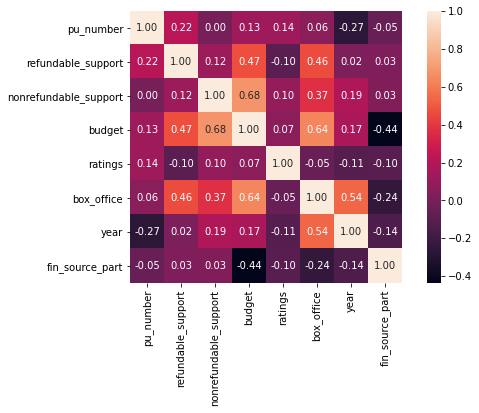

In [38]:
f, ax = plt.subplots(figsize=(9, 5))
#sns.set(font_scale=0.95)
sns.heatmap(df_filtered.corr(method='spearman'), annot=True, square=True, \
            fmt='.2f', annot_kws={'size':10})
plt.show()

Наблюдается значительная прямая линейная связь между следующими признаками:

* `общим бюджетом фильма` и `объёмом возвратных средств государственной поддержки`;
* `общим бюджетом фильма` и `объемом невозвратных средств государственной поддержки`;
* `общим бюджетом фильма` и `суммой сборов от проката`;
* `годом выхода в прокат` и `суммой сборов от проката`.

Так же исходя из матрицы корреляции есть незначительная прямая линейная связь между:

* `годом выхода в прокат` и `объемом невозвратных средств государственной поддержки`;
* `годом выхода в прокат` и `общим бюджетом фильма`;
* `номером прокатного удостоверения` и `объёмом возвратных средств государственной поддержки`.

Отрицательная линейная связь между `долей гос.поддержки` (признак `['fin_source_part']`) и `общим бюджетом фильма` (признак `['budget']`) объясняется их обратной пропорциональной зависимостью при расчете по формуле на шаге 2.6. данного проекта. В данном случае намного интересней отрицательная линейная связь между:

* `долей гос.поддержки` и `суммой сборов от проката`; 
* `долей гос.поддержки` и `годом выхода в прокат`.

### Графики распределения

Построим графики распредления по наиболее интресным найденным признакам.

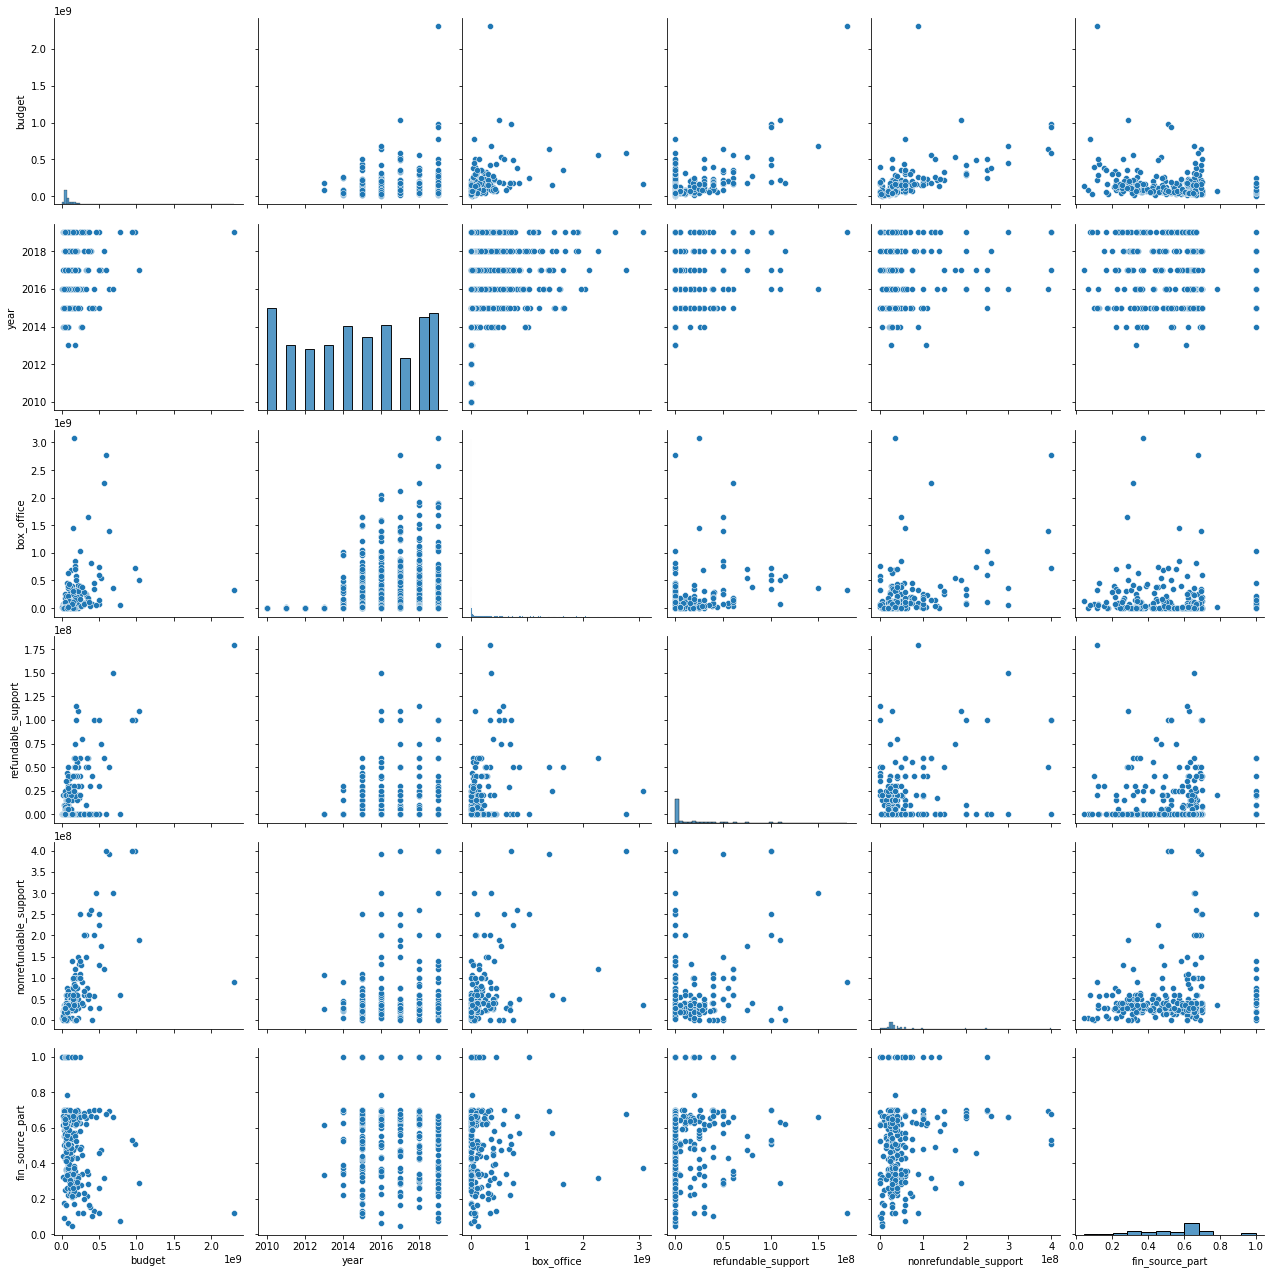

In [39]:
col = ['budget', 'year', 'box_office', 'refundable_support', 'nonrefundable_support', 'fin_source_part']
#sns.set()
sns.pairplot(df_filtered[col], height=3)
plt.show()

Основные закономерности, которые можно увидеть на графиках распредления:

* отсутствие `гомоскедастичности` у любых двух признаков;
* зависимость наиболее выражена у признаков `['budget']` и `['refundable_support']`, `['budget']` и `['nonrefundable_support']`, что объясняется прямопропорциональной зависимостью, так как в `сумму бюджета` уже могут входить `возвратные` и `невозвратные средства гос.поддержки` по условиям проекта;
* менее выражена зависимость между признаками `['budget']` и `['box_office']`. Чем больше денег тратится на фильм (бюджет), тем выше сумма сборов от проката. Такую зависимость легко объяснить большей тратой денег на рекламу например, которая привлекает больше зрителей, а значит и больший кассовый доход. Так же большая часть фильмов с высоким бюджетом являются более `качественными` и соотвественно `лидерами проката`;
* с каждым `годом` в определенной степени увеличивается `общий бюджет` (затраты на фильм), `сборы от прокатов`, `невозвратные средства гос.поддержки`, но при этом общая `доля гос.поддержки` уменьшается;
* можно сказать что у небольшого количества фильмов с более высокой `долей гос.поддержки` `сборы от прокатов` выше;

c 2014 по 2019 год:

* увеличиваются затраты на создание фильмов (`общий бюджет фильма`);
* увеличиваются `сборы от прокатов`;
* увеличивается `объем невозвратных средств государственной поддержки`;
* незначительно уменьшается `доля гос.поддержки` от `общего бюджета` фильмов.

### Зависимость гос. поддержки от года проката

Посмотрим как в период проката с `2014` по `2019` год изменялась `сумма возвратных` и `невозвратных средств гос.поддержки`. Так же интересно было бы соотнести данный результат с изменением `доли гос. поддержки от общего бюджета` за тот же период времени.

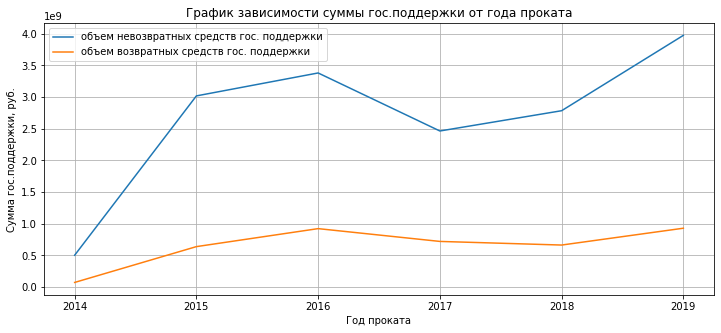

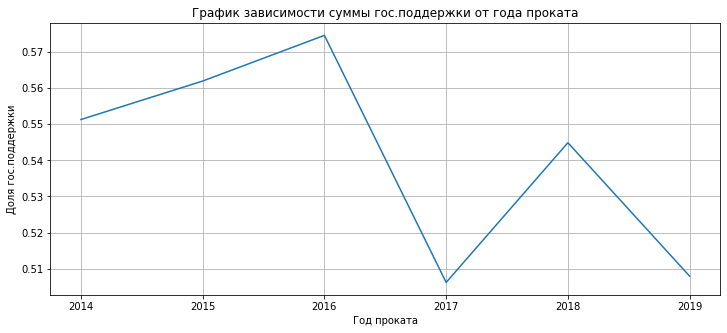

In [40]:
# строим сводную таблицу по суммам возвратных и невозвратных средств гос.поддержки в период с 2014 по 2019 год
fin_source = df_filtered.loc[df_filtered['year'] > 2013].pivot_table(
    index='year',
    values=['refundable_support', 'nonrefundable_support'], 
    aggfunc='sum'
)

# строим сводную таблицу по доле гос. поддержки от общего бюджета фильма в период с 2014 по 2019 год
fin_source_prt = df_filtered.loc[df_filtered['year'] > 2013].pivot_table(
    index='year', 
    values='fin_source_part', 
    aggfunc='mean'
)

# построим первый график
fin_source.plot(
    title='График зависимости суммы гос.поддержки от года проката',
    xlabel='Год проката',
    ylabel='Сумма гос.поддержки, руб.',
    figsize=(12, 5),
    grid=True
)
plt.legend(['объем невозвратных средств гос. поддержки', 'объем возвратных средств гос. поддержки'])

# построим второй график
fin_source_prt.plot(
    title='График зависимости суммы гос.поддержки от года проката',
    xlabel='Год проката',
    ylabel='Доля гос.поддержки',
    figsize=(12, 5),
    grid=True,
    legend=False
)

plt.show()

Из графиков можно сделать следующий вывод:

* `объем невозвратных средств` намного выше, чем `бъем возвратных средств` гос.поддержки за весь представленный период;
* показатели `объема возвратных` и `невозвратных средств` как и `доля гос. поддержки` росли до 2016 года;
* к 2017 году произошло падение всех показателей;
* к 2018 году снова отмечен рост `доли гос.поддержки`. Но к 2019 году она снова упала до показателя 2017 года;
* в период с 2017 по 2019 год `объем невозвратных средств` значительно увеличился, чего нельзя сказать об `объеме возвратных средств`;
* в целом в период с 2014 по 2019 год несмотря на тенденцию роста `объема невозвратных средств` `доля гос. поддержки` относительно всего `бюджета` затрат на создание фильма падает, как уже было отмечено в п.1.4.2.

### Жанры фильмов с наибольшей и наименьшей долей гос. поддержки

Посмотрим в каком `жанре` представлены фильмы, имеющие наибольшую и наименьшую  `долю гос. поддержки`. Для оценки вместо среднего значения используем медиану, отражающую основную массу фильмов в каждом жанре.

In [41]:
df_filtered.pivot_table(
    index='main_genre',
    values='fin_source_part',
    aggfunc='median').sort_values(by='fin_source_part', ascending=False)

,fin_source_part
main_genre,
детский,0.6675
реальное ТВ,0.6620
криминал,0.6560
unknown,0.6500
ужасы,0.6415
семейный,0.6400
фэнтези,0.6250
драма,0.6200
триллер,0.6160


Фильмы, имеющие наибольшую `долю гос. поддержки` сняты в жанрах: `'детский'`, `'реальное ТВ'`, `'криминал'`.
Фильмы, имеющие наименьшую `долю гос. поддержки` сняты в жанрах: `'история'`, `'военный'`, `'биография'`.

### Окупаемость фильмов с гос.поддержкой

Очень важно отметить перед исследованием то, что в исходных данных только 332 прокатных удостоверения (условно фильмов) имеют данные о бюджете и гос.поддержке, которые очень важны для определеня окупаемости. Это очень небольшая выборка, чтобы делать какие-либо уверенные заключения и так же, что немаловажно, отсутсвует возможность сравнить окупаемость в разрезе фильмов, имеющих и не имеющих гос. поддержку. Но в рамках проекта попробуем определить какие-либо зависисмости в той части прокатных удостоверений, которые имеют данные.

Для оценки окупаемости фильмов, имеющих гос. поддержку, используем такие признаки, как `доля гос. поддержки`, `бюджет` и `сборы от прокатов`. Для начала создадим еще один признак `['payback']` (`окупаемость`), который расчитывется как отношение `сборов от проката` к общему `бюджету`.
Затем проверим коррелируют ли новый созданный признак `окупаемости` и `доля гос. поддержки`. В дополнение можно построить график их распределения.

In [42]:
# создаем новый признак окупаемости
df_filtered['payback'] = df_filtered['box_office'] / df_filtered['budget']

# расчитываем коэффициент корреляции Спирмэна 
df_filtered[['payback', 'fin_source_part']].corr(method='spearman')

,payback,fin_source_part
payback,1.000000,-0.133809
fin_source_part,-0.133809,1.000000


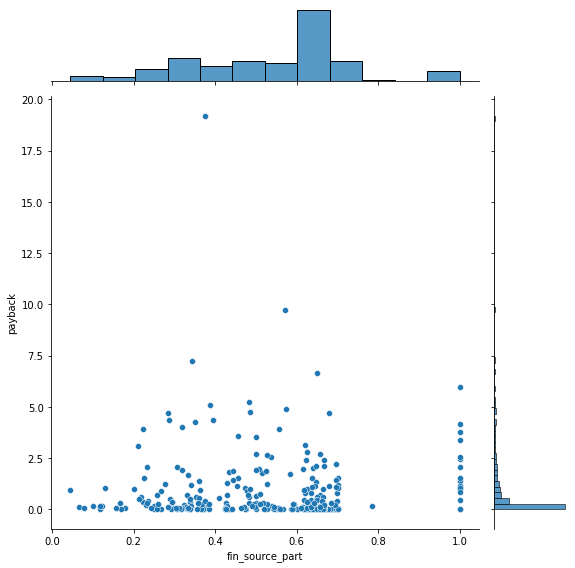

In [43]:
# построим график
sns.jointplot(data=df_filtered, x='fin_source_part', y='payback', height=8);

Согласно коэффициента корреляции существует слабая отрицательная линейная связь между `окупаемостью` и `долей гос. поддержки`. Таким образом можно было бы сказать что, чем больше `доля гос.поддержки`, тем меньше окупаемость и наоборот. Но в связи с малой выборкой, как отмечалось выше, и исходя из графика распределения видно, что большая часть фильмов не окупается (расположена ближе к нулю на гистограмме), и при этом так же имеет `долю гос.поддержки` примерно равную 0.7. Говорить о какой-либо значимости в найденых закономерностях нельзя, так как могут быть другие более значимые признаки, влияющие на `окупаемость` и имеющие нелинейную зависимость.

### Рейтинг фильмов с гос. поддержкой

Для оценки `рейтинга` фильмов с `гос.поддержкой` и без неё построим `boxplots` с использованием библиотеки `seaborn` для обоих случаев и сравним стастические данные. 

Для начала создадим признак `['is_financing_source']` с флагом `1` или `0`, обозначающим имеет ли фильм государственную поддержку (`1` - имеет, `0` - не имеет). Затем построим график по колонке `['ratings']` (`'рэйтинг'`).

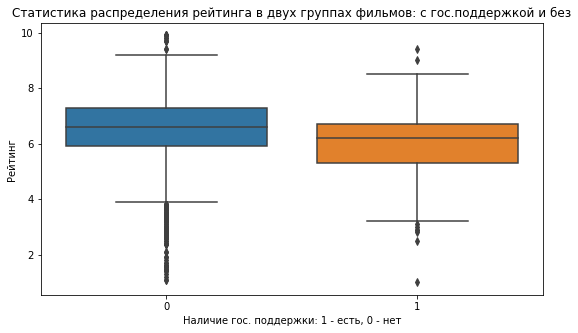

In [44]:
# создадим признак определяющий есть ли гос.поддержка
df_filtered['is_financing_source'] = (~df_filtered['fin_source_part'].isna()).astype(int)

# построим boxplots
_, ax = plt.subplots(figsize=(9, 5))
sns.boxplot(x='is_financing_source', y='ratings', data=df_filtered)
ax.set_title('Cтатистика распределения рейтинга в двух группах фильмов: с гос.поддержкой и без')
ax.set_xlabel('Наличие гос. поддержки: 1 - есть, 0 - нет')
ax.set_ylabel('Рейтинг')
plt.show()

Из графика видно что в среднем `рейтинг` у фильмов, имеющих `гос. поддержку`, немного ниже чем у фильмов без неё.

## Шаг 5. Общий вывод

1) При исследовании данных рынка российского кинопроката была проведена работа по предобработке данных,включая поиск и обработка явных и неявных дубликатов, обработка количественных и категориальных признаков с приведением к нужному типу, а так же обосновано оставление пропусков в исходных данных. Обработанные данные были сохранены в отдельный датафрейм `df_filtered`, для сохранения первоначальных данных. 

2) Были подсчитаны и добавлены в таблицу новые колонки (признаки):

* информация о годе проката;
* имя и фамилия главного режиссёра;
* основной жанр фильма;
* доля гос.поддержки от общего бюджета фильма;
* окупаемость;
* бинарный признак наличия гос.поддержки у фильма.

Данные параметры позволили провести более детальный анализ для определения зависимостей и закономерностей.

3) На шаге 3 - исследовательского анализа  данных по предложенным в проекте шагам, были выявлены следующие особенности и закономерности в данных:

* больше всего фильмов (чуть меньше 1000) было выпущего в прокат в 2010 и 2019 годах. Меньше всего (около 500) в 2017 году. Стоит отметить, что как уже было определено ранее, некоторые фильмы получали несколько прокатных удостоверений и вошли в статистику как отдельно взятые фильмы по условиям задачи;
* до `2014 года` доля прокатных удостоверений, имеющих информацию о прокате (сборах) росла равномерно до `35%`. В `2015 году` отмечается скачкообразный рост до `65%`. Далее с `2016 года` отмечается неустойчивая тенденция с небольшим спадом до `52%` в `2018 году`;
* с `2010` по `2013` год `сумма сборов` на порядки ниже чем, в остальные годы. Такие `сборы` могут говорить либо о том, что множество фильмов в этот период согласно представленных прокатных удостоверений не имели никаких `сборов` (что маловероятно), либо в данных о прокате в российских кинотеатрах (согласно объединенного файла `mkrf_shows.csv`) отсутсвтуют такие данные по многим прокатным удостоврениям. Таким образом судить о минимальной и максимальной сумме сборов по годам можно лишь условно без наличия полных данных: - в `2010-2013` годах сумма сборов была `минимальной`, - в `2018` году сумма сборов была `максимальной`;
* в `2017` году большая часть фильмов собрала в среднем почти `1 млн. руб.`, что больше чем в остальные годы;
* в `2010 - 2014` годах в среднем сборы составили намного меньше, чем в `2015-2019` годах;
* фильмы с возрастным ограничением в `'16+ - для детей старше 16 лет'` собрали больше всего денег в прокате. Так же необходимо обратить внимание на то, что и количество прокатных удостоверений (или условно `'фильмов'`) представленных в данной категории больше всего, исходя из представленных данных о прокатных сборах;
* фильмы с возрастным ограничением в `'16+ - для детей старше 16 лет'` собирали больше всего денег в прокате с середины 2015 года по 2019 год. Скорее всего это связано с большим количеством высококассовых фильмов в данном сегменте; 
* фильмы с возрастным ограничением в `'0+ - для любой зрительской аудитории'` собирали меньше всего денег в прокате на протяжении представленного периода с 2015 по 2019 год. Возможно это связано с малым количеством фильмов в данной категории и как итог сумма сборов ниже, чем по остальным категориям;
* в 2017 году по категории возрастное ограничение - `'12+ - для детей старше 12 лет'` сборы значительно упали в то время как по остальным категорям наоборот выросли. Возможно в данный год фильмов с другими возрастными ограниченями было выпущено в прокат больше, в том числе кассовых.

4) На шаге 4 - исследовательского анализа данных фильмов, которые получили государсвтенную поддержку, были выявлены следующие особенности и закономерности в данных:

4.1) Наблюдается значительная прямая линейная связь между следующими признаками:

* `общим бюджетом фильма` и `объёмом возвратных средств государственной поддержки`;
* `общим бюджетом фильма` и `объемом невозвратных средств государственной поддержки`;
* `общим бюджетом фильма` и `суммой сборов от проката`;
* `годом выхода в прокат` и `суммой сборов от проката`.

Так же исходя из матрицы корреляции есть незначительная прямая линейная связь между:

* `годом выхода в прокат` и `объемом невозвратных средств государственной поддержки`;
* `годом выхода в прокат` и `общим бюджетом фильма`;
* `номером прокатного удостоверения` и `объёмом возвратных средств государственной поддержки`.

Отрицательная линейная связь между `долей гос.поддержки` (признак `['fin_source_part']`) и `общим бюджетом фильма` (признак `['budget']`) объясняется их обратной пропорциональной зависимостью при расчете по формуле на шаге 2.6. данного проекта. В данном случае намного интересней отрицательная линейная связь между:

* `долей гос.поддержки` и `суммой сборов от проката`; 
* `долей гос.поддержки` и `годом выхода в прокат`.

4.2) Основные закономерности, которые можно увидеть на графиках распредления:

* отсутствие `гомоскедастичности` у любых двух признаков;
* зависимость наиболее выражена у признаков `['budget']` и `['refundable_support']`, `['budget']` и `['nonrefundable_support']`, что объясняется прямопропорциональной зависимостью, так как в `сумму бюджета` уже могут входить `возвратные` и `невозвратные средства гос.поддержки` по условиям проекта;
* менее выражена зависимость между признаками `['budget']` и `['box_office']`. Чем больше денег тратится на фильм (бюджет), тем выше сумма сборов от проката. Такую зависимость легко объяснить большей тратой денег на рекламу например, которая привлекает больше зрителей, а значит и больший кассовый доход. Так же большая часть фильмов с высоким бюджетом являются более `качественными` и соотвественно `лидерами проката`;
* с каждым `годом` в определенной степени увеличивается `общий бюджет` (затраты на фильм), `сборы от прокатов`, `невозвратные средства гос.поддержки`, но при этом общая `доля гос.поддержки` уменьшается;
* можно сказать что у небольшого количества фильмов с более высокой `долей гос.поддержки` `сборы от прокатов` выше;

c 2014 по 2019 год:

* увеличиваются затраты на создание фильмов (`общий бюджет фильма`);
* увеличиваются `сборы от прокатов`;
* увеличивается `объем невозвратных средств государственной поддержки`;
* незначительно уменьшается `доля гос.поддержки` от `общего бюджета` фильмов.

4.3) Зависимость объема средств гос.поддержки от года проката:

* `объем невозвратных средств` намного выше, чем `бъем возвратных средств` гос.поддержки за весь представленный период;
* показатели `объема возвратных` и `невозвратных средств` как и `доля гос. поддержки` росли до 2016 года;
* к 2017 году произошло падение всех показателей;
* к 2018 году снова отмечен рост `доли гос.поддержки`. Но к 2019 году она снова упала до показателя 2017 года;
* в период с 2017 по 2019 год `объем невозвратных средств` значительно увеличился, чего нельзя сказать об `объеме возвратных средств`;
* в целом в период с 2014 по 2019 год несмотря на тенденцию роста `объема невозвратных средств` `доля гос. поддержки` относительно всего `бюджета` затрат на создание фильма падает, как уже было отмечено в п.1.4.2.

4.4) Жанры фильмов с наибольшей и наименьшей долей гос. поддержки:

* фильмы, имеющие наибольшую `долю гос. поддержки` сняты в жанрах: `'детский'`, `'реальное ТВ'`, `'криминал'`;
* фильмы, имеющие наименьшую `долю гос. поддержки` сняты в жанрах: `'история'`, `'военный'`, `'биография'`.

4.5) Окупаемость фильмов с гос.поддержкой:

* наблюдается слабая отрицательная линейная связь между `окупаемостью` и `долей гос. поддержки`. Таким образом можно было бы сказать что, чем больше `доля гос.поддержки`, тем меньше окупаемость и наоборот; 
* большая часть фильмов не окупается, и при этом так же имеет `долю гос.поддержки` примерно равную 0.7; 
* говорить о какой-либо значимости в найденых закономерностях нельзя, так как могут быть другие более значимые признаки, влияющие на `окупаемость` и имеющие нелинейную зависимость.

4.6) Рейтинг фильмов с гос. поддержкой: 

* в среднем `рейтинг` у фильмов, имеющих `гос. поддержку`, немного ниже чем у фильмов без неё.

**Рекомендации по результатам исследования:**

1) для более детального и полного анализа в исходных данных необходима информация о дате выхода (премьеры) фильма, а так же дате  выхода в прокат для каждого прокатного удостоверения. В текущих данных дата указана скорее как дата выдачи прокатного удостоверения;

2) найти информацию о типе каждого прокатного удостоверения, где разрешен показ (кинотеатр, цифровые носители и т.д.);

3) слишком малая выборка с доступной информацией о бюджете и объеме гос.поддержки, чтобы провести анализ, особенно в период с 2010 по 2014 год. Необходимо больше данных.